In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2, chisquare

In [10]:
SEMILLA = ((99730+100866+96786+93762)//4)

def GCL_con_rango(n,Xo,incremento, modulo, multiplicador):
    """Recibe como parametro cinco enteros, numero de iteraciones n, semilla Xo,
    , incremnto, modulo y multiplicador. 
    Los numeros random generados estan entre 0 y 1.
    Imprime el valor de cada iteracion"""
    resultados = [Xo]
    for i in range(n):
        resultados.append(((resultados[i]*multiplicador + incremento) % modulo))  
    resultados.pop(0)
    for i in range(n):
        resultados[i] = resultados[i]/modulo   
    return resultados

In [11]:
def obtener_tam_gap_test(muestra):
    '''Dada una muestra de numeros aleatorios cuenta cuantos nuemeros seguidos
    pertenecen al intervalo [0.2;0.5] y devuelve un arreglo'''
    repeticiones = 0
    frequencias = []
    for n in range(len(muestra)):
        if (0.2 <= muestra[n] <= 0.5 and repeticiones>=0):
            frequencias.append(repeticiones)
            repeticiones = 0
            continue
        repeticiones+=1
    if (repeticiones>0):
        frequencias.append(repeticiones)
    return frequencias

In [12]:
def obtener_frec_tam_gap_observadas(freq_gap_test):
    '''Dada una lista cuenta la cantidad de elementos repetidos en un diccionario'''
    frequencias = {i:freq_gap_test.count(i) for i in freq_gap_test}
    return frequencias

In [13]:
muestra = GCL_con_rango(100000,SEMILLA,1664525, 2**32, 1013904223)

In [14]:
#Defino geometrica para obtener las probabilidades esperadas
def prob_geom(x):
    p = 0.3
    q = ((1-p)**(x-1))*p
    return q

In [15]:
#Busco el estadistico con la formula vista en la practica
def chisquare_test_geom(frecuencias_obs): 
    estadistico = 0
    n = sum(list(frecuencias_obs.values()))
    for tam in frecuencias_obs:
        p = prob_geom(tam)
        estadistico += ((frecuencias_obs.get(tam)-n*p)**2) / (n*p)
    return estadistico

In [16]:
#Cuentos los gaps y la cantidad de veces que halla aparecido un gap de tamaño n.
tam_gap_test = obtener_tam_gap_test(muestra)
print(tam_gap_test[0:5])

frequencias_tam_gap_observadas = obtener_frec_tam_gap_observadas(tam_gap_test)
print(frequencias_tam_gap_observadas)

[2, 3, 0, 1, 4]
{0: 8963, 1: 6444, 2: 4384, 3: 3065, 4: 2101, 5: 1515, 6: 1061, 7: 721, 8: 526, 9: 356, 10: 280, 11: 180, 12: 136, 13: 91, 14: 57, 15: 39, 16: 26, 17: 29, 18: 12, 19: 13, 20: 7, 21: 2, 22: 2, 23: 1, 24: 1, 25: 1, 27: 2, 32: 1, 38: 1}


In [17]:
#Paso diccionario a arreglo de numpy
names = ['tam_gap','cant_repeticiones']
formats = ['i8','i8']
dtype = dict(names = names, formats=formats)
frequencias = np.array(list(frequencias_tam_gap_observadas.items()), dtype=dtype)
print(frequencias)
print(repr(frequencias))

[( 0, 8963) ( 1, 6444) ( 2, 4384) ( 3, 3065) ( 4, 2101) ( 5, 1515)
 ( 6, 1061) ( 7,  721) ( 8,  526) ( 9,  356) (10,  280) (11,  180)
 (12,  136) (13,   91) (14,   57) (15,   39) (16,   26) (17,   29)
 (18,   12) (19,   13) (20,    7) (21,    2) (22,    2) (23,    1)
 (24,    1) (25,    1) (27,    2) (32,    1) (38,    1)]
array([( 0, 8963), ( 1, 6444), ( 2, 4384), ( 3, 3065), ( 4, 2101),
       ( 5, 1515), ( 6, 1061), ( 7,  721), ( 8,  526), ( 9,  356),
       (10,  280), (11,  180), (12,  136), (13,   91), (14,   57),
       (15,   39), (16,   26), (17,   29), (18,   12), (19,   13),
       (20,    7), (21,    2), (22,    2), (23,    1), (24,    1),
       (25,    1), (27,    2), (32,    1), (38,    1)],
      dtype=[('tam_gap', '<i8'), ('cant_repeticiones', '<i8')])


# Test estadistico
Aplicar un gap test al generador congruencial lineal implementado en el ejercicio 1 utilizando el intervalo [0,2 - 0,5].
Analizar el resultado obtenido, e indicar si la distribución de probabilidades pasa o no el test.
Considerar un nivel de significación del 1%.

In [18]:
#Busco el estadistico
estadistico = chisquare_test_geom(frequencias_tam_gap_observadas)
estadistico

3937.685890226105

In [19]:
frecuencias_observadas = list(frequencias_tam_gap_observadas.values())
print(frecuencias_observadas)

frecuencias_esperadas = []
for i in range(len(frecuencias_observadas)):
    frecuencias_esperadas.append(round(prob_geom(i) * sum(frecuencias_observadas), 0))

print(frecuencias_esperadas)

[8963, 6444, 4384, 3065, 2101, 1515, 1061, 721, 526, 356, 280, 180, 136, 91, 57, 39, 26, 29, 12, 13, 7, 2, 2, 1, 1, 1, 2, 1, 1]
[12864.0, 9005.0, 6304.0, 4412.0, 3089.0, 2162.0, 1513.0, 1059.0, 742.0, 519.0, 363.0, 254.0, 178.0, 125.0, 87.0, 61.0, 43.0, 30.0, 21.0, 15.0, 10.0, 7.0, 5.0, 4.0, 2.0, 2.0, 1.0, 1.0, 1.0]


In [20]:
chisquare(f_obs = frecuencias_observadas, f_exp = frecuencias_esperadas)


Power_divergenceResult(statistic=3873.318092577635, pvalue=0.0)

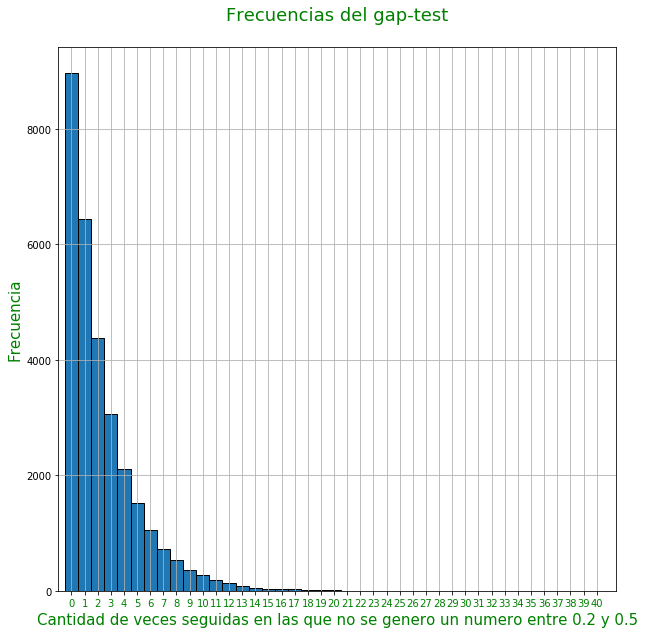

In [22]:
ticksx = list(range(41))
plt.rcParams["figure.figsize"] = (10,10)
bins = np.arange(-0.5,40.5,1)
plt.hist(tam_gap_test, edgecolor='k', bins=bins)
plt.xlim(left=-1)
plt.xticks(ticksx, color="green")
plt.title('Frecuencias del gap-test\n', fontsize=18).set_color("green")
plt.xlabel('Cantidad de veces seguidas en las que no se genero un numero entre 0.2 y 0.5', fontsize=15).set_color("green")
plt.ylabel('Frecuencia', fontsize=15).set_color("green")
plt.grid();